#### 각 시장별 워드 클라우드를 시각화해, 시장별 트렌드를 파악

워드 클라우드를 통한 트렌드파악은, 실시간 변동성이 큰 위험도 3단계와 밀접한 연관이 있을것으로 예상됩니다.

이를 통해 고위험도 종목에 접근할때, 투자선택에 도움을 주는 좀더 많은 정보 확보를 기대합니다.

In [1]:
from wordcloud import WordCloud

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
import FinanceDataReader as fdr

In [6]:
from tqdm import tqdm

In [7]:
tqdm.pandas()

In [8]:
from collections import Counter

In [9]:
from konlpy.tag import Okt

In [10]:
df = pd.read_csv('community_add_poslabel.csv')

In [11]:
krx_df = fdr.StockListing('KRX')

In [26]:
# df['내용2'] = df[['내용_명사_str','형용사_어간','부사_어간','동사_어간']].fillna('').progress_apply(lambda x : ' '.join(x), axis=1)

100%|██████████| 81072/81072 [00:00<00:00, 165124.29it/s]


In [12]:
df.head(2)

,닉네임,날짜,내용,종목,내용_토큰,label
0,GROK,2025-01-11T22:59:18+09:00,- 디자인 변화: S25 울트라는 기존의 각진 디자인에서 둥근 모서리로 변경되었으며...,005930,디자인 변화 울트라 기존 디자인 에서 둥글다 모서리 변경 되어다 카메라 모듈 디자인...,1
1,공감아,2025-01-11T22:47:22+09:00,7만원 8만원에 물려있는게 대부분이라 7만원까지 혹여 올라도 물려있던분들은 원금 회...,005930,만원 만원 물리다 대부분 이라 만원 까지 오르다 물리다 분들 원금 회복 다시 매도 ...,-2


In [13]:
# df와 krx_df를 '종목'과 'Code'를 기준으로 병합
df = df.merge(
    krx_df[['Code', 'Market']],
    left_on='종목',
    right_on='Code',
    how='left'
)

# '시장' 열 이름을 변경합니다.
df.rename(columns={'Market': '시장'}, inplace=True)
# '시장' 열의 NaN 값을 'ETF'로 채웁니다.
df['시장'] = df['시장'].fillna('ETF')
# 'Code' 열 삭제 (필요한 경우)
df.drop(columns=['Code'], inplace=True)

In [21]:
df.head(2)

,닉네임,날짜,내용,종목,내용_토큰,label,시장
0,GROK,2025-01-11T22:59:18+09:00,- 디자인 변화: S25 울트라는 기존의 각진 디자인에서 둥근 모서리로 변경되었으며...,005930,디자인 변화 울트라 기존 디자인 에서 둥글다 모서리 변경 되어다 카메라 모듈 디자인...,1,KOSPI
1,공감아,2025-01-11T22:47:22+09:00,7만원 8만원에 물려있는게 대부분이라 7만원까지 혹여 올라도 물려있던분들은 원금 회...,005930,만원 만원 물리다 대부분 이라 만원 까지 오르다 물리다 분들 원금 회복 다시 매도 ...,-2,KOSPI


In [63]:
df['종목'] = df['종목'].astype(str)

In [20]:
df['시장'].value_counts()

시장
KOSPI     48471
KOSDAQ    26822
ETF        2354
Name: count, dtype: int64

In [22]:
df.to_csv('community_add_market2.csv', index=False, encoding='utf-8-sig')

In [29]:
# Okt 객체 생성
okt = Okt()

# 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)  # 명사 추출
    return ' '.join(nouns)  # 명사를 공백으로 연결하여 반환

df['명사_추출'] = df['내용_토큰'].apply(extract_nouns)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72512 entries, 0 to 72511
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   닉네임     72512 non-null  object
 1   날짜      72512 non-null  object
 2   내용      72512 non-null  object
 3   종목      72512 non-null  object
 4   내용_토큰   72512 non-null  object
 5   label   72512 non-null  int64 
 6   시장      72512 non-null  object
 7   명사_추출   72512 non-null  object
dtypes: int64(1), object(7)
memory usage: 4.4+ MB


In [49]:
stopwords = ['투자','주가','주식','국장','다시','가능성',
                '거래','보고','수익','오늘','사람','한국',
                '생각','소식','지금','이번','회사','동학',
                '시장','올해','내년','국내','해외','배당',
                '기업', '미국', '외인','대한', 
                  '주주', '그냥','실적', '성장',
                '진짜', '글로벌', '기술', '매출', '계속',
                '전자', '탄핵', '이익', '사업', '팔고',
                '정도', '목표', '사고', '시작', '예상',
                '영업', '때문', '이상', '대비', '개미', 
                '이제', '하나', '여기', '관련', '정치', 
                '기사', '이유', '통해','조금', '내일',
                '문제', '상황', '계약', '모두', '언제', 
                '보기', '주요', '외국인','우리', '어제',
                '한번', '주님','경우', '아래', '프로', 
                '추가', '상품', '지급', '하락', '비중',
                '매달','버스', '예정', '고민', '정리',
                '구매', '차이', '운용', '현재', '혜택',
                '오르다',' 부터','파다', '리다','알다',
                '가지','부터','어디','시간','역시','치',
                '제발','보이','간다','이다','건가','가다',
                '평단', '기관', '개인','기대', '환율', 
                '다른', '얼마', '무슨', '발표','일단',
                '이나', '비', '쉬', '하루', '자리', 
                '이건', '확대', '화이팅','만원'
                ]

In [93]:
# word_counts 추출함수

def extract_text_by_market(market) : 
  
  # 전처리 파일 불러오기
  try: 
    df = pd.read_csv('community_add_market.csv', low_memory=False)
  except FileNotFoundError:
    print('파일을 로드하지 못했습니다. 파일 경로를 재확인하세요.')
    return Counter()  
  
  # 불용어 목록 (다회의 워드클라우드를 그리며 불용어 제거)
  
  stopwords = ['투자','주가','주식','국장','다시','가능성',
                '거래','보고','수익','오늘','사람','한국',
                '생각','소식','지금','이번','회사','동학',
                '시장','올해','내년','국내','해외','배당',
                '기업', '미국', '외인','대한', 
                '주주', '그냥','실적', '성장',
                '진짜', '글로벌', '기술', '매출', '계속',
                '전자', '탄핵', '이익', '사업', '팔고',
                '정도', '목표', '사고', '시작', '예상',
                '영업', '때문', '이상', '대비', '개미', 
                '이제', '하나', '여기', '관련', '정치', 
                '기사', '이유', '통해','조금', '내일',
                '문제', '상황', '계약', '모두', '언제', 
                '보기', '주요', '외국인','우리', '어제',
                '한번', '주님','경우', '아래', '프로', 
                '추가', '상품', '지급', '하락', '비중',
                '매달','버스', '예정', '고민', '정리',
                '구매', '차이', '운용', '현재', '혜택',
                '오르다',' 부터','파다', '리다','알다',
                '가지','부터','어디','시간','역시','치',
                '제발','보이','간다','이다','건가','가다',
                '평단', '기관', '개인','기대', '환율', 
                '다른', '얼마', '무슨', '발표','일단',
                '이나', '비', '쉬', '하루', '자리', 
                '이건', '확대', '화이팅','만원'
                ]
    
  df['명사_추출'] = df['명사_추출'].str.replace('^ +', "", regex=True) # white space 제거
  df = df.replace('', np.nan)  # 빈 문자열을 NaN으로 변환
  df = df.dropna(subset=['명사_추출'])  # NaN 값이 있는 행 제거
  
  contents_text = ' '.join(df[df['시장'] == market]['명사_추출'])  # 특정 시장에 대한 모든 내용을 하나의 문자열로 결합
  words = contents_text.split(' ')  # 공백으로 단어 분리
 
  filtered_words = [word for word in words if word not in stopwords]  # 불용어 제거
  word_counts = Counter(filtered_words)                               # 단어 빈도수 계산
  
  return word_counts

In [67]:
# KOSPI에 해당하는 '내용2' 데이터만 필터링
kospi_text = ' '.join(df[df['시장'] == 'KOSPI']['내용2'])  # KOSPI에 대한 모든 내용을 하나의 문자열로 결합
kospi_words = kospi_text.split(', ')  # 쉼표로 단어 분리
# 한 글자 단어 제거
filtered_words_kospi = [word for word in kospi_words if len(word) > 1]  # 한 글자 단어 제거
# 불용어 제거
filtered_words_kospi = [word for word in filtered_words_kospi if word not in stopwords]

word_counts_kospi = Counter(filtered_words_kospi)  # 단어 빈도수 계산

In [75]:
# KOSDAQ에 해당하는 '내용2' 데이터만 필터링
kosdaq_text = ' '.join(df[df['시장'] == 'KOSDAQ']['내용2'])  # KOSDAQ에 대한 모든 내용을 하나의 문자열로 결합
kosdaq_words = kosdaq_text.split(', ')  # 쉼표로 단어 분리
# 한 글자 단어 제거
filtered_words_kosdaq = [word for word in kosdaq_words if len(word) > 1]  # 한 글자 단어 제거
# 불용어 제거
filtered_words_kosdaq = [word for word in filtered_words_kosdaq if word not in stopwords]

word_counts_kosdaq = Counter(filtered_words_kosdaq)  # 단어 빈도수 계산

In [81]:
# ETF에 해당하는 '내용2' 데이터만 필터링
etf_text = ' '.join(df[df['시장'] == 'ETF']['내용2'])  # ETF에 대한 모든 내용을 하나의 문자열로 결합
etf_words = etf_text.split(', ')  # 쉼표로 단어 분리
# 한 글자 단어 제거
filtered_words_etf = [word for word in etf_words if len(word) > 1]  # 한 글자 단어 제거
# 불용어 제거
filtered_words_etf = [word for word in filtered_words_etf if word not in stopwords]


word_counts_etf = Counter(filtered_words_etf)  # 단어 빈도수 계산

In [87]:
# 워드클라우드 생성 함수 정의
def display_word_cloud(market=None, stopwords=[], max_words=50, width=1200, height=600):
    font_path = r'C:\Windows\Fonts\malgun.ttf'  # 한글 폰트 경로
    if market not in ['KOSPI','KOSDAQ','ETF'] :
        raise ValueError("'KOSPI','KOSDAQ','ETF' 세 시장만 지원하는 함수입니다.")
    
    # word_counts 추출함수 호출
    word_counts = extract_text_by_market(market)
    
    if not word_counts:
        print("예상치 못한 이유로 해당시장 커뮤니티 내용의 문자열 결합이 이루어지지 않았습니다.")
        return None  # 빈 값 반환
    
    word_cloud = WordCloud(
        font_path=font_path, 
        width=width, 
        height=height,
        stopwords=stopwords,
        background_color='white',
        max_words=max_words,
        min_word_length=2,
        random_state=2024
    ).generate_from_frequencies(word_counts)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(word_cloud)
    plt.axis('off')  # 축 숨기기
    plt.show()
    
    print('상위 50 카운트 단어')
    for word, count in word_counts.most_common(50):  # 상위 50개 단어
        print(f"{word}: {count}")
        
    return word_cloud

#### 코스피 시장의 트렌드 파악

1. 트럼프, 중국 : 글로벌 경제와 정치적 요인이 코스피 시장에 영향을 미치고 있음을 추측
2. 리스크, 안정 : 비교적 변동성이 적고, 우량주가 많은 코스피 시장에서 이러한 단어는 현재 시장에 대한 우려를 반영
3. 반도체, 하이닉스, 엔비디아 : 반도체 산업과 관련된 기업들이 주목받고 있음


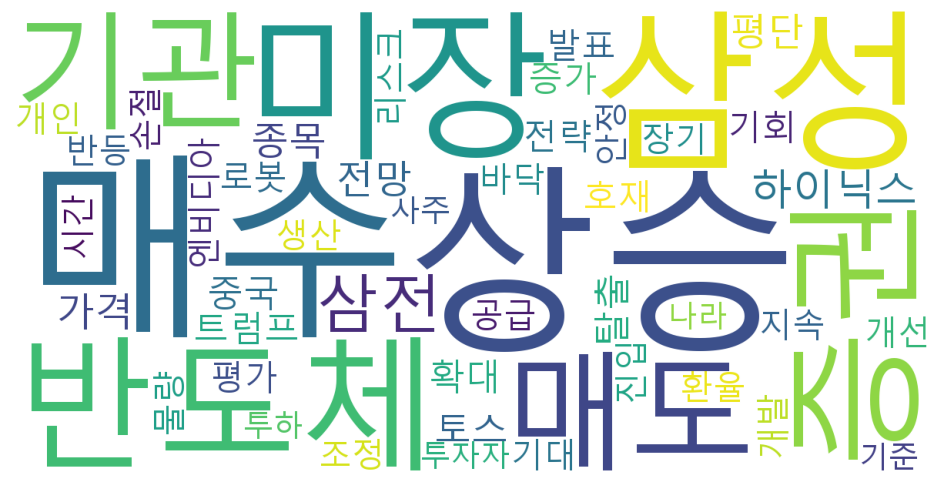

In [91]:
display_word_cloud('KOSPI')

#### 워드 클라우드로 보는 코스닥 시장의 트렌드 



1. 로봇, 초전도체, 로보틱스: 기술 관련 단어들이 포함되어 있으며, 이는 코스닥 시장에서 기술주 또는 혁신적인 기업들이 주목받고 있음을 나타냅니다.
2. 개발, 특허: 새로운 기술의 개발과 관련된 기업들이 주목받고 있으며, 특허 출원과 같은 혁신적인 활동이 이루어지고 있음을 보여줍니다.

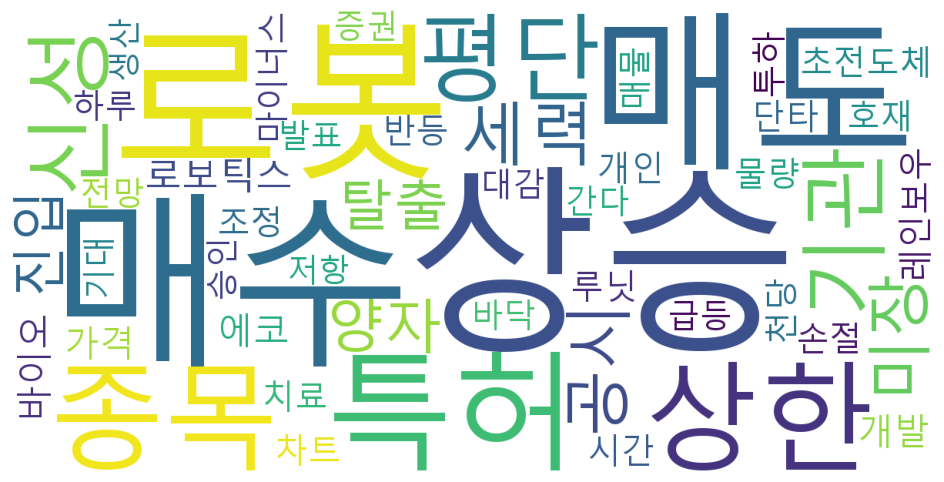

In [92]:
display_word_cloud('KOSDAQ')

#### ETF 시장의 워드클라우드 트렌드 분석

1. 상승, 기준, 지수, 나스닥, 코스피, 다우존스: ETF의 성과를 시장 지수와 비교하는 중요성이 강조되고 있습니다. 투자자들은 ETF가 추종하는 지수의 성과를 분석하여 투자 결정을 내리려는 경향
2. 매수, 배당률, 수익률, 안정, 장기: 투자자들이 안정적인 수익을 추구하고 있으며, 장기적인 투자 전략을 세우고 있다는 것을 나타냅니다. 배당률은 안정적인 수익을 제공하는 ETF에 대한 관심을 반영합니다.
3. 수수료, 인하: 투자자들이 비용을 줄이기 위해 수수료 인하를 고려하고 있다는 것을 나타냅니다. 이는 투자 효율성을 높이기 위한 전략으로 해석될 수 있습니다
4. 테크, 리츠, 테슬라: 특정 산업(테크, 리츠)과 관련된 ETF에 대한 관심이 높아지고 있으며, 이는 기술 혁신과 관련된 투자에 대한 긍정적인 전망을 반영합니다.
5. 달러, 환율: 외환 변동성이 ETF 투자에 미치는 영향을 고려하는 투자자들이 많다는 것을 보여줍니다. 특히, 달러와 관련된 ETF에 대한 관심이 높아지고 있습니다.
6. 금리, 영향, 비교: 시장의 금리가 투자자 행동에 미치는 영향을 분석하고 있으며, 이는 투자자들이 금리 변화에 민감하게 반응하고 있음을 나타냅니다.

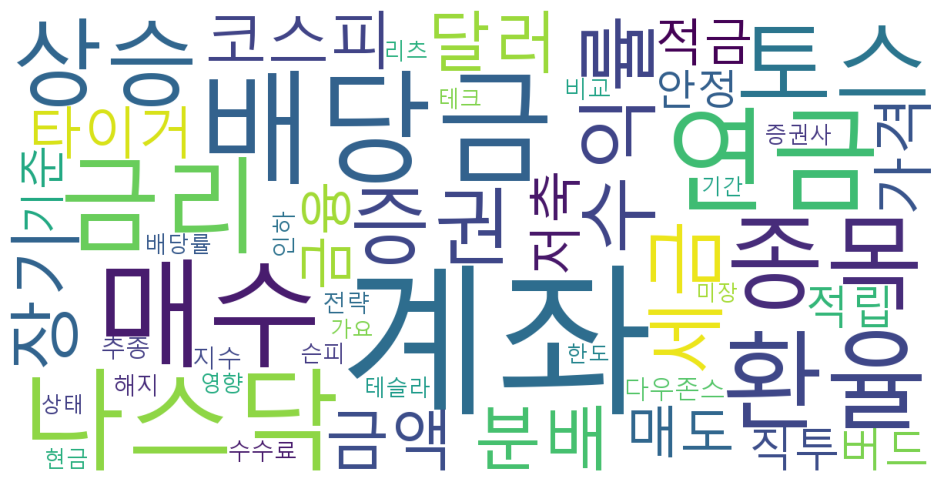

In [93]:
display_word_cloud('ETF')

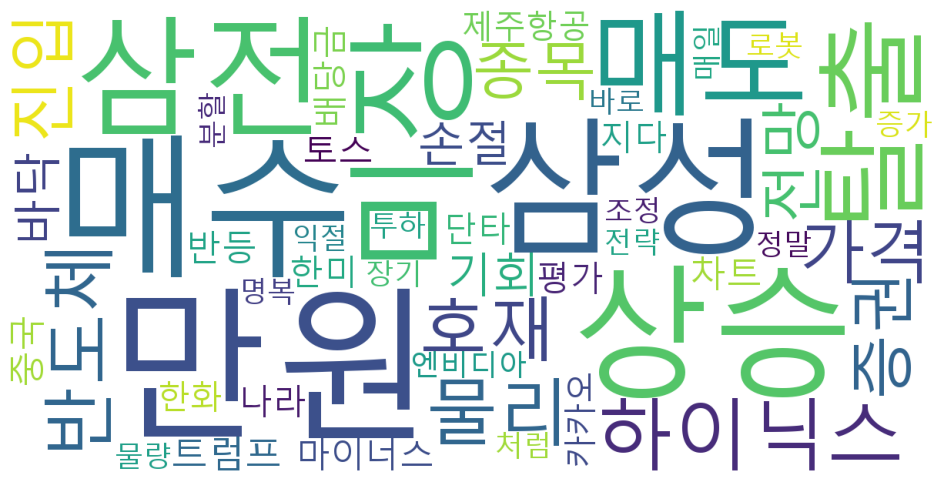

상위 50 카운트 단어
만원: 1501
매수: 1271
삼성: 1192
상승: 1119
미장: 938
삼전: 907
매도: 672
탈출: 651
하이닉스: 626
물리: 549
반도체: 548
호재: 494
가격: 473
진입: 470
증권: 437
전망: 410
종목: 409
손절: 404
바닥: 398
기회: 379
트럼프: 371
중국: 357
차트: 357
반등: 338
토스: 336
마이너스: 335
배당금: 335
한미: 334
단타: 321
나라: 316
지다: 311
평가: 310
제주항공: 310
카카오: 305
한화: 301
엔비디아: 300
분할: 280
증가: 277
로봇: 277
전략: 274
조정: 271
물량: 268
매일: 266
장기: 265
정말: 265
처럼: 260
투하: 254
명복: 250
익절: 248
바로: 247


In [92]:
display_word_cloud('KOSPI')

1. 매수 및 매도 심리

    만원 (1501): 특정 가격대에 대한 높은 관심을 나타내며, 투자자들이 이 가격에서 매수 또는 매도를 고민하고 있음을 시사합니다.
    매수 (1271), 매도 (672): 매수 단어의 빈도가 매도 단어보다 두 배 이상 높아, 현재 KOSPI 시장에서 매수세가 강하다는 것을 반영합니다. 이는 투자자들이 주식 시장에 대한 긍정적인 전망을 가지고 있다는 신호입니다.

2. 주요 기업 및 산업

    삼성 (1192), 하이닉스 (626): 이 두 대기업은 KOSPI에서 중심적인 역할을 하고 있으며, 주요 기업에 대한 높은 언급은 이들 기업의 주가가 시장 전반에 미치는 영향을 나타냅니다.
    반도체 (548): 반도체 산업에 대한 언급이 많아, 이 산업이 현재 주목받고 있다는 것을 알 수 있습니다. 글로벌 반도체 수요의 변화가 KOSPI 시장에 큰 영향을 미치고 있을 가능성이 큽니다.

3. 시장의 방향성과 기대

    상승 (1119), 호재 (494): 상승과 호재라는 단어의 빈도가 높다는 것은 투자자들이 현재 시장에 대해 긍정적인 전망을 가지고 있음을 나타냅니다. 이는 시장 상승에 대한 기대감이 높다는 것을 의미합니다.
    진입 (470), 기회 (379): 투자자들이 특정 가격대에서 진입 기회를 포착하고 있다는 신호로, 시장의 회복에 대한 기대가 있음을 나타냅니다.

4. 투자자의 심리

    탈출 (651), 손절 (404): 손실을 최소화하려는 투자자들의 심리를 보여줍니다. 이는 변동성이 큰 시장에서 투자자들이 불안감을 느끼고 있다는 신호일 수 있습니다.
    물리 (549): 주가가 하락하면서 손실을 보았다는 의미로, 투자자들이 주식의 하락에 대해 걱정하고 있다는 것을 나타냅니다.

5. 외부 요인

    트럼프 (371), 중국 (357): 외부 경제 요인과 관련된 언급이 있어, 글로벌 경제 상황이 KOSPI 시장에 미치는 영향을 고려할 필요가 있음을 나타냅니다. 특히, 미국과 중국의 경제 정책이나 시장 동향이 한국 시장에 미치는 영향이 클 수 있습니다.

6. 기술적 요소 및 기타

    차트 (357), 전략 (274), 조정 (271): 기술적 분석과 관련된 단어의 언급으로, 투자자들이 기술적 지표를 통해 시장의 흐름을 파악하고 있다는 것을 나타냅니다.
    배당금 (335): 배당금에 대한 언급은 안정적인 수익을 추구하는 투자자들이 많다는 것을 보여줍니다.
    분할 (280): 분할 투자에 대한 언급은 리스크를 줄이기 위한 전략을 사용하고 있다는 것을 의미합니다.

결론

KOSPI 시장은 긍정적인 투자 심리를 보이며, 주요 기업인 삼성과 하이닉스에 대한 높은 관심이 두드러집니다. 매수세가 강하고, 상승세에 대한 기대감이 높지만, 손실 회피 심리와 시장의 변동성에 대한 불안감도 함께 존재하는 복합적인 분위기를 반영하고 있습니다.

투자자들은 글로벌 경제 상황과 주요 기업의 동향을 주의 깊게 살펴보아야 하며, 기술적 분석을 통해 시장의 흐름을 파악하고, 적절한 투자 전략을 세워야 할 것입니다. 전반적으로 KOSPI 시장은 성장 가능성이 큰 산업과 관련된 투자에 긍정적인 분위기를 보이고 있습니다.

탈출 (651), 손절 (404) 물리 (549), 평단 (821) 바닥 (398) 마이너스, : 

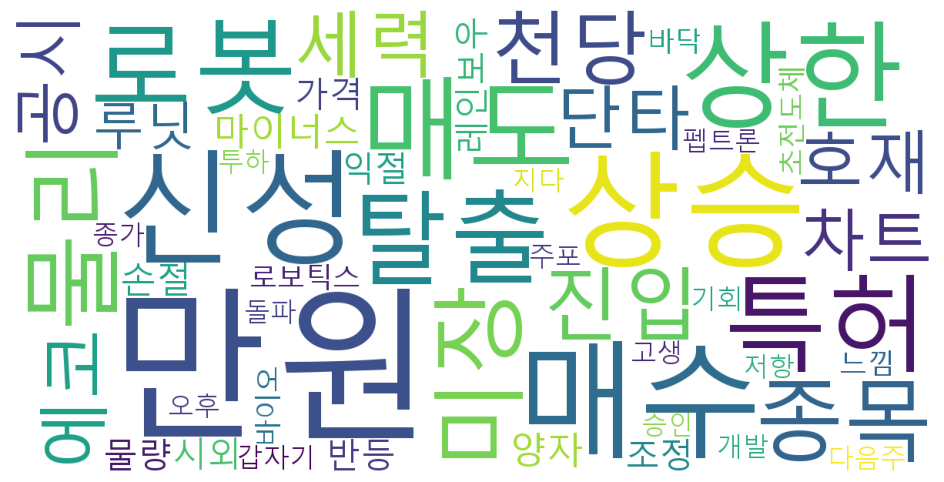

상위 50 카운트 단어
만원: 587
매수: 304
상승: 300
신성: 298
상한: 252
매도: 236
로봇: 217
특허: 210
탈출: 197
물리: 192
미장: 173
종목: 170
천당: 161
진입: 160
세력: 153
에코: 151
단타: 141
호재: 137
공시: 137
차트: 134
루닛: 128
마이너스: 125
양자: 125
손절: 120
반등: 112
시외: 111
가격: 111
조정: 109
레인보우: 108
물량: 107
익절: 102
로보틱스: 100
초전도체: 99
느낌: 98
바닥: 94
바이오: 93
펩트론: 90
지다: 89
개발: 88
오후: 87
주포: 87
투하: 86
다음주: 85
고생: 83
갑자기: 81
종가: 80
기회: 80
돌파: 79
저항: 78
승인: 77


In [90]:
display_word_cloud('KOSDAQ')

    만원 (587): 특정 가격대를 주목하는 경향이 드러납니다. 이는 투자자들이 특정 가격에서 매수나 매도를 고려하고 있다는 신호입니다.
    매수 (304), 매도 (236): 매수 단어의 빈도가 매도 단어보다 높아, KOSDAQ 시장에서 매수세가 강하게 나타나고 있습니다. 이는 긍정적인 시장 심리를 반영합니다.

2. 기술 및 산업 관련 키워드

    로봇 (217), 로보틱스 (100): 로봇 및 로보틱스 관련 단어의 언급은 해당 산업에 대한 높은 관심을 나타냅니다. 이는 자동화와 관련된 기술의 발전이 투자자들 사이에서 주목받고 있다는 것을 의미합니다.
    신성 (298), 특허 (210), 양자 (125): 신성장 산업과 특허 기술에 대한 관심이 높습니다. 이는 혁신적인 기술이나 기업에 대한 투자자들의 기대감이 반영된 결과입니다.
    바이오 (93): 바이오 산업에 대한 언급이 있어, KOSDAQ 시장에서 생명과학 및 헬스케어 관련 기업에 대한 관심이 높다는 것을 알 수 있습니다.

3. 시장의 방향성과 기대

    상승 (300), 반등 (112): 상승세와 반등에 대한 언급이 많아, 투자자들이 시장의 상승 가능성에 대한 기대를 가지고 있다는 것을 나타냅니다.
    호재 (137), 공시 (137): 긍정적인 뉴스와 정보에 대한 언급이 많아, 투자자들이 시장의 긍정적인 요소를 주목하고 있다는 것을 시사합니다.

4. 투자자의 심리

    탈출 (197), 손절 (120): 손실을 최소화하려는 투자자들의 심리가 반영됩니다. 이는 시장의 변동성이 크고, 투자자들이 불안감을 느끼고 있다는 신호일 수 있습니다.
    물리 (192): 손실을 나타내는 단어로, 주가 하락에 대한 우려가 있으며, 투자자들이 주가 하락에 따른 심리적 압박을 느끼고 있다는 것을 의미합니다.

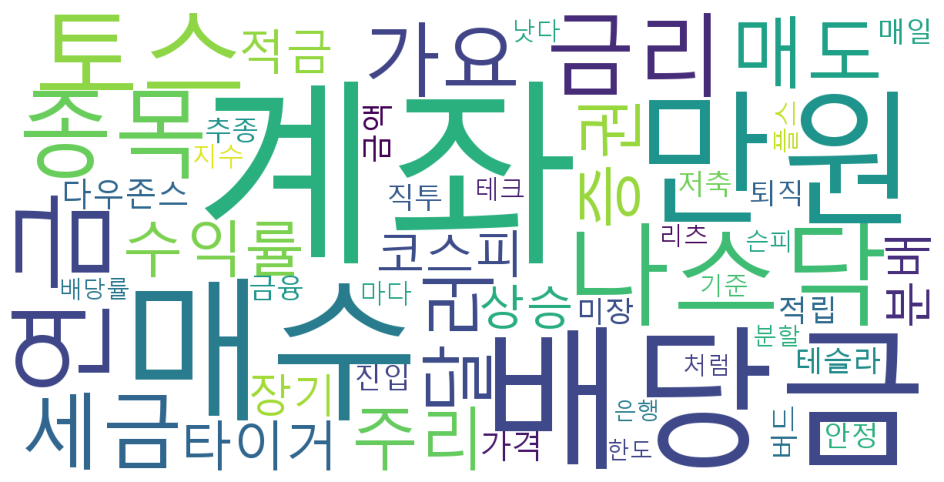

상위 50 카운트 단어
계좌: 156
매수: 88
배당금: 87
만원: 79
나스닥: 73
토스: 70
연금: 69
종목: 55
금리: 48
세금: 40
가요: 38
매도: 36
달러: 34
주리: 34
증권: 34
수익률: 34
타이거: 32
코스피: 32
분배: 31
적금: 30
상승: 30
장기: 29
다우존스: 28
가격: 27
금액: 26
적립: 25
미장: 24
테슬라: 24
진입: 23
직투: 23
금융: 22
저축: 22
퇴직: 22
매일: 22
버드: 22
안정: 22
추종: 21
플스: 21
지수: 20
마다: 20
테크: 19
낫다: 18
기준: 18
리츠: 18
슨피: 17
처럼: 17
분할: 17
배당률: 17
은행: 16
한도: 16


In [91]:
display_word_cloud('ETF')

1. 투자 심리와 매수/매도 동향

    계좌 (156): 투자자들이 금융 상품을 관리하기 위해 계좌를 개설하고 있다는 것을 나타냅니다. 이는 ETF 투자에 대한 관심이 증가하고 있음을 시사합니다.
    매수 (88), 매도 (36): 매수 단어의 빈도가 매도보다 크게 높아, 현재 ETF 시장에서 매수세가 강하다는 것을 보여줍니다. 이는 투자자들이 ETF에 대한 긍정적인 전망을 가지고 있음을 반영합니다.

2. 배당 및 수익 관련 키워드

    배당금 (87), 배당률 (17): 배당금과 배당률에 대한 언급이 많아, 투자자들이 안정적인 수익을 추구하고 있다는 것을 나타냅니다. ETF 투자자들은 배당금을 통한 수익을 중요하게 생각하고 있습니다.
    수익률 (34): 수익률에 대한 언급은 투자자들이 ETF의 성과를 평가하는 데 관심이 있다는 것을 나타냅니다.

3. 시장 흐름과 글로벌 동향

    나스닥 (73), 미장 (24), 다우존스 (28): 미국 시장에 대한 언급이 많아, ETF 투자자들이 글로벌 시장 동향에 큰 영향을 받고 있다는 것을 보여줍니다. 이는 ETF가 주로 미국 주식에 기반한 상품이 많기 때문입니다.
    코스피 (32): KOSPI에 대한 언급이 있어, 한국 시장과의 연관성도 고려되고 있음을 나타냅니다.

4. 자산 관리 및 금융 상품

    연금 (69), 퇴직 (22): 연금과 퇴직 관련 언급은 ETF가 장기적인 자산 관리 수단으로서의 역할을 하고 있음을 나타냅니다. 이는 안정적인 은퇴 자산을 구축하기 위한 투자로 ETF가 인식되고 있다는 것을 의미합니다.
    적금 (30), 저축 (22): 안정적인 금융 상품과의 비교에서 ETF가 자산 증식을 위한 선택지로 고려되고 있음을 알 수 있습니다.

5. 투자 전략과 기술적 요소

    직투 (23), 추종 (21): 직접 투자와 특정 지수를 추종하는 ETF의 언급이 많아, 투자자들이 전략적으로 ETF를 활용하고 있다는 것을 나타냅니다.
    분할 (17): 분할 투자에 대한 언급은 투자자들이 리스크를 줄이기 위한 전략을 사용하고 있다는 것을 보여줍니다.

6. 기타 키워드

    토스 (70): 금융 플랫폼에 대한 언급으로, 투자자들이 모바일 플랫폼을 통해 ETF에 접근하고 있다는 것을 나타냅니다.
    금리 (48), 세금 (40): 금리와 세금에 대한 관심은 투자자들이 ETF 투자로 인한 재무적 영향을 고려하고 있다는 것을 시사합니다.

결론

ETF 시장은 매수세가 강하고, 특히 배당 수익을 중요하게 여기는 투자자들이 많습니다. 글로벌 시장, 특히 미국 시장의 동향에 큰 영향을 받고 있으며, 장기적인 자산 관리를 위한 수단으로서 ETF에 대한 관심이 높아지고 있습니다.

투자자들은 ETF의 수익률과 배당금, 투자 전략을 고려하여 안정적인 자산 증식을 추구하고 있으며, 모바일 플랫폼을 통한 접근성도 높아지고 있습니다. 전반적으로 ETF 시장은 긍정적인 투자 심리를 바탕으로 성장하고 있는 것으로 보입니다.